<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/Prabhhav_PCA_Iris_and_DIGIT_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = StandardScaler().fit_transform(iris.data)


In [4]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.95, whiten=True)

In [5]:
# Conduct PCA
X_pca = pca.fit_transform(X)

In [6]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 4
Reduced number of features: 2


In [7]:
X_pca

array([[-1.32123186,  0.50041748],
       [-1.21403663, -0.70276984],
       [-1.37929566, -0.35643181],
       [-1.34146506, -0.62277102],
       [-1.39423839,  0.67431207],
       [-1.21092698,  1.55243577],
       [-1.425851  ,  0.04966806],
       [-1.30264721,  0.2326271 ],
       [-1.36203363, -1.16270528],
       [-1.27434115, -0.48893662],
       [-1.26382937,  1.08802522],
       [-1.3570691 ,  0.13873132],
       [-1.29424841, -0.75962934],
       [-1.53615587, -1.00235023],
       [-1.28274938,  1.93906982],
       [-1.31978019,  2.80039421],
       [-1.28791079,  1.54663108],
       [-1.277854  ,  0.50960351],
       [-1.10763046,  1.46470209],
       [-1.36712589,  1.1757589 ],
       [-1.11681962,  0.42622334],
       [-1.28757542,  0.96337685],
       [-1.61855789,  0.47781349],
       [-1.06101521,  0.08919294],
       [-1.29933124,  0.14308484],
       [-1.1387108 , -0.65219402],
       [-1.19664555,  0.25245033],
       [-1.26515198,  0.54954212],
       [-1.24822532,

## Calc accuracy for x and xpca

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

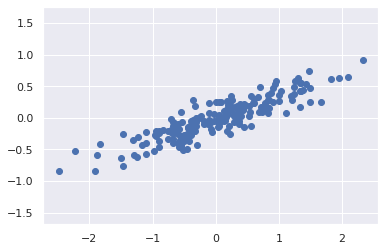

In [9]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
print(pca.components_)


[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [12]:
print(pca.explained_variance_)


[0.7625315 0.0184779]


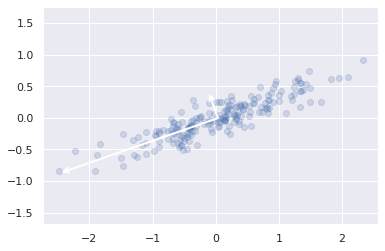

In [13]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [14]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


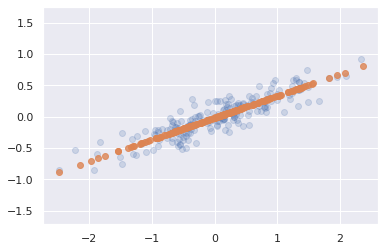

In [15]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

In [17]:
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X)

In [18]:
clf = LogisticRegression(random_state=0).fit(X_pca, y)
clf.score(X_pca, y)

0.9666666666666667

## Skelarn Digits

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [20]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


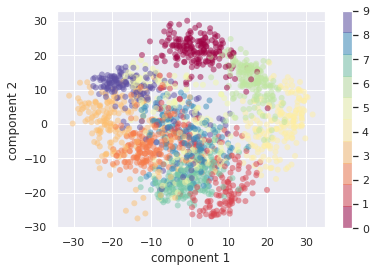

In [21]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]


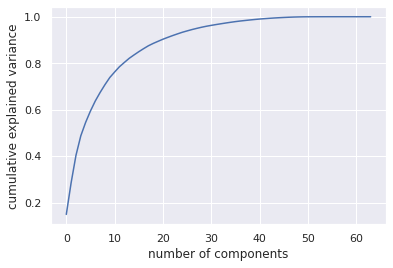

In [22]:
pca = PCA().fit(digits.data)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Compare accuracy for 30, 40 ,64 features

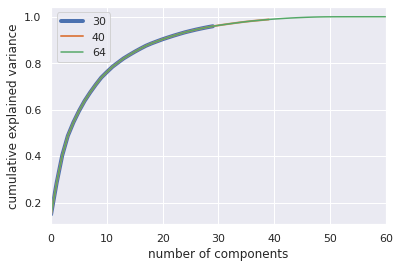

In [23]:
from sklearn.decomposition import PCA

pca1 = PCA(30)
pca2 = PCA(40)
pca = PCA()
projected1 = pca1.fit_transform(digits.data)
projected2 = pca2.fit_transform(digits.data)
projected = pca.fit_transform(digits.data)
s1=np.cumsum(pca1.explained_variance_ratio_)
plt.plot(s1,label = "30",linewidth=4)
s2=np.cumsum(pca2.explained_variance_ratio_)
plt.plot(s2,label = "40",linewidth=2)
s=np.cumsum(pca.explained_variance_ratio_)
plt.plot(s,label = "64")
plt.xlim(0,60)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend()

In [24]:
projected1.shape

(1797, 30)

In [ ]:
print("number of components=30:",s1[-1])
print("number of components=40:",s2[-1])
print("number of components=64:",s[-1])

number of components=30: 0.9590800666646124
number of components=40: 0.9882027335345668
number of components=64: 1.0000000000000002


## PCA as Noise Filtering

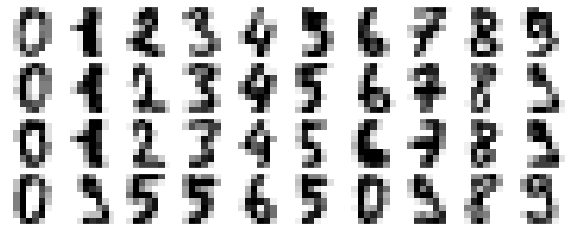

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

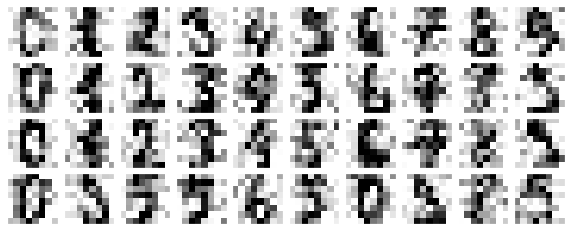

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

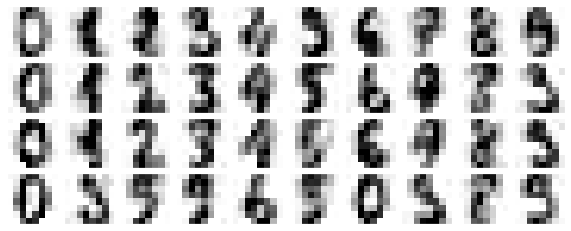

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)